In [ ]:
# !pip install numpy
# !pip install -U scikit-learn

In [3]:
import matplotlib
import matplotlib.pyplot as plt

## Введение в библиотеку Scikit-learn.

## Обучение с учителем.

## Классификация.

Начнем с подготовки данных для работы. Scikit-learn уже имеет встроенные базы данных.

Извлечем набор данных из openml.

Метод sklearn.datasets.'data-name'(), в нашем случае - sklearn.datasets.fetch_openml() , вызывается с соответствующими параметрами.
Документация к sklearn.datasets.fetch_openml и параметрам: https://scikit-learn.org/0.21/modules/generated/sklearn.datasets.fetch_openml.html

Импортируемая нами база данных содержит в себе изображения с цифрами, написанными от руки.

Импортируем базу данных.

In [4]:
from sklearn.datasets import fetch_openml

Определим два массива с данными.

In [5]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)

В X будет определен массив характеристик элементов, в y будет определен массив меток соответсвующих элементов.

Посмотрим, что содержат в себе X и y

In [6]:
print(X.shape)
print(y.shape)

(70000, 784)
(70000,)


Существует 70 000 изображений (28x28) и с каждым изображением связано 784 признака.

Возьмем некоторое изображение из X, т.е. извлечем вектор признаков образца.

In [7]:
some_digit = X[36000]

Придадим ему форму массива 28x28 и отобразим его содержимое.

In [8]:
some_digit_image = some_digit.reshape(28, 28)

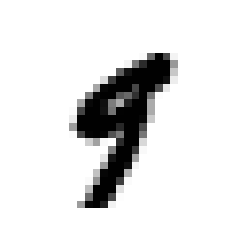

In [9]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

ключ или метка этого образца подтверждает, что это цифра 9

In [10]:
y[36000]

'9'

Данные всегда должны иметь испытательный набор.
Наш набор данных MNIST уже разделен на обучающий (первые 60 000 изображений) и испытательный (последние 10 000 изображений) наборы.

In [11]:
X_train, X_test, y_train, y_test = X[:100], X[60100:60200], y[:100], y[60100:60200]

Перетасуем обучающий набор.

In [12]:
import numpy as np
shuffle_index = np.random.permutation(100)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

Перейдем непосредственно к классификации.

Импортируем Support Vector Machines. SVM - набор методов для обучения с учителем, использующихся для классификации, регрессии и выявления аномалий. Документация по Support Vector Machines: https://scikit-learn.org/stable/modules/svm.html

In [13]:
from sklearn import svm

Создадим нашу модель на основе метода Support Vector Classification.

In [14]:
clf = svm.SVC(gamma='scale')

Метод fit обучает нашу модель.

In [15]:
clf.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

После обучения модель можно использовать для классификации.

Возьмем некоторую картинку (элемент).

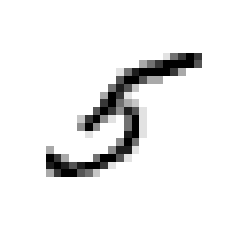

In [16]:
some_digit2 = X_test[35]
some_digit_image2 = some_digit2.reshape(28, 28)
plt.imshow(some_digit_image2, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

Попросим нашу модель определить ее класс с помощью метода predict.

In [17]:
clf.predict([some_digit2])

array(['5'], dtype=object)

Наш объект (картинка) определен в класс "5".

## Регрессия.

Создадим свою базу данных - точки на плоскости.

In [18]:
X_regr = np.sort(5 * np.random.rand(50,1), axis=0)
y_regr = np.sin(X_regr).ravel()

Создадим наши модели. Линейная регрессия и полиномиальная регрессия соответственно. Регрессия с помощью Support Vector Machines: https://scikit-learn.org/stable/modules/svm.html#regression

In [19]:
svr_lin = svm.SVR(kernel='linear', C=100, gamma='auto')
svr_poly = svm.SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1, coef0=1)

Обучим наши модели.

In [20]:
svr_lin.fit(X_regr, y_regr)

SVR(C=100, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
    kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [21]:
svr_poly.fit(X_regr, y_regr)

SVR(C=100, cache_size=200, coef0=1, degree=3, epsilon=0.1, gamma='auto',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

Используем наши модели для построения точек для каждой точки из X.

In [22]:
points_for_lin = svr_lin.predict(X_regr)
points_for_poly = svr_poly.predict(X_regr)

Визуализируем результат.

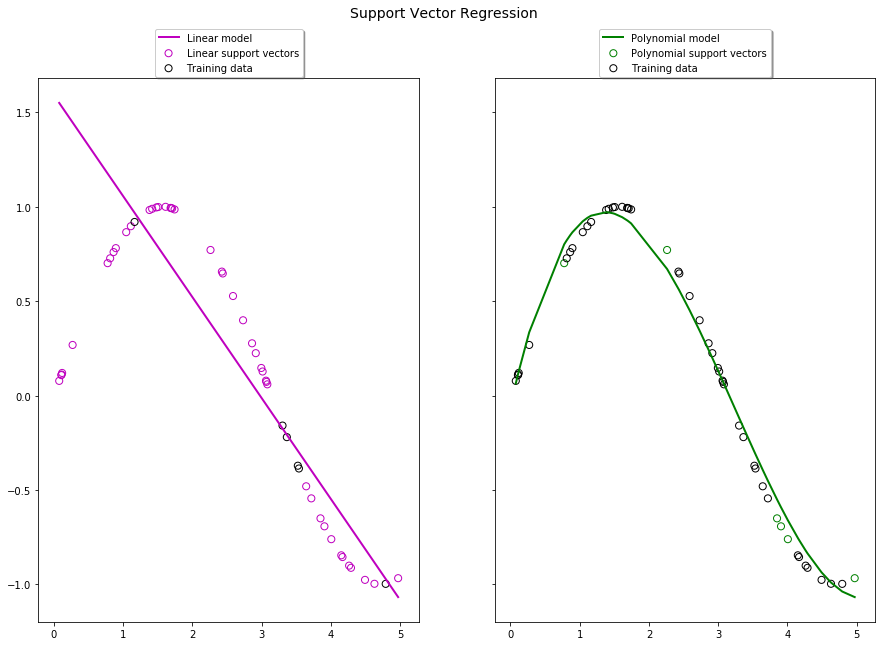

In [23]:
svrs = [svr_lin, svr_poly]
kernel_label = ['Linear', 'Polynomial']
model_color = ['m', 'g']
lw = 2

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X_regr, svr.fit(X_regr, y_regr).predict(X_regr), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    axes[ix].scatter(X_regr[svr.support_], y_regr[svr.support_], facecolor="none",
                     edgecolor=model_color[ix], s=50,
                     label='{} support vectors'.format(kernel_label[ix]))
    axes[ix].scatter(X_regr[np.setdiff1d(np.arange(len(X_regr)), svr.support_)],
                     y_regr[np.setdiff1d(np.arange(len(X_regr)), svr.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='Training data')
    axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1), # training data
                    ncol=1, fancybox=True, shadow=True)


fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()

## Обучение без учителя.

## Кластеризация.

Импортируем модуль с алгоритмами кластеризации.

In [28]:
from sklearn import cluster

Будем использовать уже знакомую нам базу данных - цифры, написанные от руки.

In [25]:
# X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
# X_train, X_test, y_train, y_test = X[:100], X[60100:60200], y[:100], y[60100:60200]

Создадим нашу модель, используя алгоритм кластеризации kMeans.

In [30]:
kmeans = cluster.KMeans(n_clusters=10, init='k-means++')

Параметр n_clusters определяет число кластеров, в нашем случае - 10 цифр.

Параметр init определяет алгоритм выбора начальных центров масс. Выберем k-means++, он считается самым оптимальным.

Документация по алгоритму кластеризации kMeans: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

В случае алгоритмов кластеризации, метод fit запускает сам алгоритм (кластеризирует данный набор), но в месте с тем все еще остается методом для обучения модели.

In [33]:
kmeans.fit(X_test)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

С помощью метода labels_ получим наше распределение объектов по кластерам.

In [36]:
kmeans.labels_

array([4, 7, 5, 2, 2, 3, 4, 0, 3, 3, 8, 0, 4, 3, 4, 3, 3, 2, 3, 8, 5, 4,
       3, 1, 4, 3, 4, 5, 9, 5, 1, 1, 5, 3, 9, 0, 6, 0, 1, 3, 4, 3, 4, 0,
       3, 4, 9, 8, 6, 4, 3, 2, 4, 5, 0, 5, 1, 6, 6, 4, 3, 1, 5, 2, 1, 5,
       3, 4, 0, 3, 3, 8, 4, 4, 8, 4, 0, 9, 0, 9, 0, 9, 4, 7, 9, 3, 8, 5,
       7, 4, 0, 4, 7, 2, 6, 4, 0, 1, 3, 8])

Уточним, что здесь для каждой картинки из нашего массива X_test указана не цифра, соответствующая картинке, а номер кластера, в который картинка была определена.

Для проверки выберем элементы, определенные в один кластер.

In [58]:
# Результаты кластеризации с большой вероятностью при каждом отдельном запуске будут различными,
# поэтому вам следует выбирать элементы в соответствии c вашими личными результатами
km1, km2 = X_test[5], X_test[8]

Изобразим наши картинки.

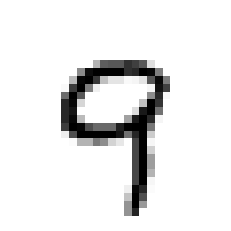

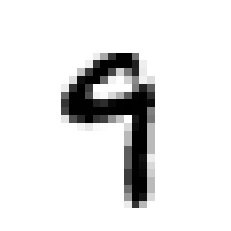

In [51]:
km1_image, km2_image = km1.reshape(28, 28), km2.reshape(28, 28),

plt.imshow(km1_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

plt.imshow(km2_image, cmap=matplotlib.cm.binary, interpolation='nearest')
plt.axis('off')
plt.show()

## Уменьшение размерности.

Чтобы визуализировать результаты кластеризации, нам необходимо привести наши картинки к двумерным точкам.
Понижение размерности - еще одна задача машинного обучения из раздела машинного обучения без учителя. Документация к методам понижения размерности: https://scikit-learn.org/stable/modules/unsupervised_reduction.html

Импортируем метод PCA.

In [60]:
from sklearn.decomposition import PCA

Здесь не будем отдельно создавать и обучать нашу модель, сразу перейдем к уменьшению размерности.

n_components задает результирующую размерность

In [72]:
reduced_data = PCA(n_components=2).fit_transform(X_test)

В reduced_data лежат наши 100 уже двумерных точек.

Нарисуем наши точки. Для этого еще раз проведем кластаризацию по уже двумерным точкам.

In [79]:
clusters_in_new_dimension = kmeans.fit(reduced_data)

In [81]:
clusters_in_new_dimension.labels_

array([7, 5, 3, 0, 4, 0, 3, 2, 4, 0, 8, 2, 2, 0, 9, 6, 6, 0, 6, 4, 5, 6,
       6, 4, 6, 6, 1, 3, 3, 8, 4, 3, 5, 0, 8, 2, 5, 2, 4, 0, 7, 6, 7, 2,
       6, 2, 4, 4, 5, 9, 0, 4, 7, 8, 2, 3, 0, 3, 8, 9, 0, 3, 5, 0, 6, 5,
       0, 9, 2, 0, 0, 7, 1, 8, 7, 9, 2, 3, 2, 1, 2, 8, 7, 5, 8, 0, 1, 1,
       5, 9, 2, 9, 8, 6, 5, 9, 2, 7, 0, 3])

Визуализация.

In [ ]:
x0, x1, x2, x3, x4, x5, x6, x7, x8, x9 = [], [], [], [], [], [], [], [], [], []
y0, y1, y2, y3, y4, y5, y6, y7, y8, y9 = [], [], [], [], [], [], [], [], [], []

for i in range(len(clusters_in_new_dimension.labels_)):
    if clusters_in_new_dimension.labels_[i] == 0:
        x0.append(reduced_data[i, 0])
        y0.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 1:
        x1.append(reduced_data[i, 0])
        y1.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 2:
        x2.append(reduced_data[i, 0])
        y2.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 3:
        x3.append(reduced_data[i, 0])
        y3.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 4:
        x4.append(reduced_data[i, 0])
        y4.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 5:
        x5.append(reduced_data[i, 0])
        y5.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 6:
        x6.append(reduced_data[i, 0])
        y6.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 7:
        x7.append(reduced_data[i, 0])
        y7.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 8:
        x8.append(reduced_data[i, 0])
        y8.append(reduced_data[i, 1])
    elif clusters_in_new_dimension.labels_[i] == 9:
        x9.append(reduced_data[i, 0])
        y9.append(reduced_data[i, 1])


for i, j, k in [(x0, y0, '#00d9ff'), (x1, y1, '#ffea00'), (x2, y2, '#ffae00'), (x3, y3, '#ae00ff'), (x4, y4, '#ff001e'),
          (x5, y5, '#00ff80'), (x6, y6, '#700027'), (x7, y7, '#420075'), (x8, y8, '#c0de85'), (x9, y9, '#cf85de')]:
    plt.scatter(i, j, color=k)
plt.show()

## Практические задания.

1. Загрузить новую базу данных из встроенных датасетов scikit-learn. Документация по встроенным датасетам: https://scikit-learn.org/stable/datasets/index.html (рекомендуется смотреть пункт 7.2)

2. Кластеризировать загруженную базу данных с помощью любого алгоритма кластеризации. Документация по всем алгоритмам кластеризации: https://scikit-learn.org/stable/modules/clustering.html#clustering

3. С помощью любого алгоритма кластеризации разбить данные на 4 кластера. Визуализировать кластеризацию.